# TidyTuesday data for [2025-07-29](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-07-29/readme.md)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [4]:
movies = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-29/movies.csv')
shows = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-29/shows.csv')


In [5]:
movies

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0
...,...,...,...,...,...,...,...,...
36116,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,الرجل الرابع,No,NaN,100000.0,1H 32M 0S,100000.0
36117,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,두근두근 내 인생,No,NaN,100000.0,1H 52M 0S,100000.0
36118,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,라디오 스타,No,NaN,100000.0,1H 56M 0S,100000.0
36119,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,선생 김봉두,No,NaN,100000.0,1H 57M 0S,100000.0


In [6]:
shows

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Adolescence: Limited Series,Yes,2025-03-13,555100000.0,3H 50M 0S,144800000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Squid Game: Season 2 // 오징어 게임: 시즌 2,Yes,2024-12-26,840300000.0,7H 10M 0S,117300000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Squid Game: Season 3 // 오징어 게임: 시즌 3,Yes,2025-06-27,438600000.0,6H 8M 0S,71500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Zero Day: Limited Series,Yes,2025-02-20,315800000.0,5H 9M 0S,61300000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Missing You: Limited Series,Yes,2025-01-01,218600000.0,3H 46M 0S,58000000.0
...,...,...,...,...,...,...,...,...
27798,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,We Are Black and British: Season 1,No,NaN,100000.0,1H 57M 0S,100000.0
27799,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000.0,59M 0S,100000.0
27800,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,Whitney Cummings: Jokes,No,2022-07-26,100000.0,1H 0M 0S,100000.0
27801,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000.0,1H 15M 0S,100000.0


In [7]:
movies["release_date"] = pd.to_datetime(movies["release_date"])
shows["release_date"] = pd.to_datetime(shows["release_date"])

In [8]:
print(movies["hours_viewed"].sum() / (24 * 365))
print(shows["hours_viewed"].sum() / (24 * 365))


11504006.849315068
31113367.579908676


In [9]:
movies.groupby('title').views.sum().sort_values(ascending=False).head(10)

title
The Boss Baby                  221300000.0
The Super Mario Bros. Movie    209900000.0
Leo                            207200000.0
Leave the World Behind         205100000.0
Damsel                         194500000.0
Minions                        190900000.0
Carry-On                       185000000.0
Lift                           175800000.0
Sing (2016)                    173700000.0
Dr. Seuss' The Grinch          168300000.0
Name: views, dtype: float64

In [10]:
shows.groupby('title').views.sum().sort_values(ascending=False).head(10)

title
Squid Game: Season 2 // 오징어 게임: 시즌 2    203800000.0
Adolescence: Limited Series             144800000.0
Fool Me Once: Limited Series            129000000.0
Bridgerton: Season 3                    123300000.0
Baby Reindeer: Limited Series           100400000.0
ONE PIECE: Season 1                      98400000.0
The Gentlemen: Season 1                  97900000.0
Peppa Pig: Season 6                      92600000.0
Avatar The Last Airbender: Season 1      86900000.0
The Perfect Couple: Season 1             86400000.0
Name: views, dtype: float64

In [13]:
movies = movies.loc[~movies["available_globally"].isin(["Available Globally?"])]
shows = shows.loc[~shows["available_globally"].isin(["Available Globally?"])]

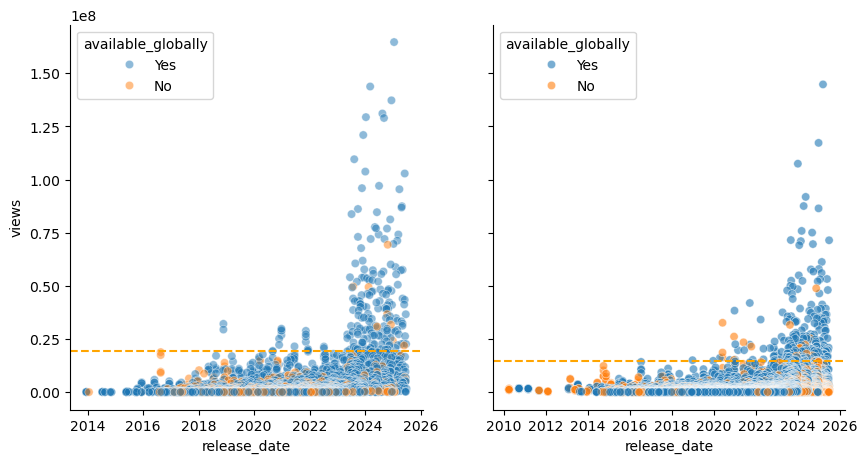

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

# Removed 'line_kws' argument as it is not valid for sns.scatterplot
sns.scatterplot(data=movies, x="release_date", y="views", ax=ax[0], alpha=0.5, hue="available_globally")
# plot median line
ax[0].axhline(movies["views"].quantile(0.99), color="orange", linestyle="--")
sns.scatterplot(data=shows, x="release_date", y="views", ax=ax[1], alpha=0.6, hue="available_globally")
ax[1].axhline(shows["views"].quantile(0.99), color="orange", linestyle="--")

# add labels to top 5 movies and shows
top5_m = movies.groupby('title').agg({'views': 'sum', 'release_date': 'first'}).sort_values(by='views', ascending=False).head(5)
top5_s = shows.groupby('title').agg({'views': 'sum', 'release_date': 'first'}).sort_values(by='views', ascending=False).head(5)

# Filter out rows with None in 'release_date'
top5_m = top5_m[top5_m['release_date'].notna()]
top5_s = top5_s[top5_s['release_date'].notna()]

#print(top5_m)
#print(top5_s)

sns.despine()
plt.show()

## Word Cloud

C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_23564\2565642893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["title_mod"] = movies["title"].str.replace("Movie", "")


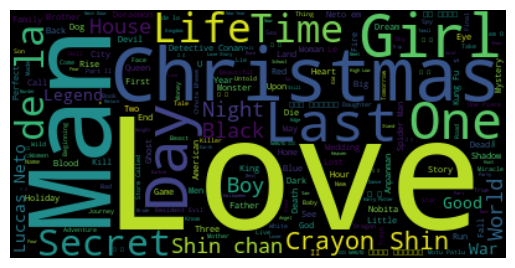

In [19]:
# make word cloud of movie titles

movies["title_mod"] = movies["title"].str.replace("Movie", "")
movies_title = " ".join([str(x) for x in movies["title_mod"]])
movies_wordcloud = WordCloud().generate(movies_title)
plt.imshow(movies_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_23564\876433027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows["title_mod"] = shows["title"].str.replace(pattern, '', regex=True)


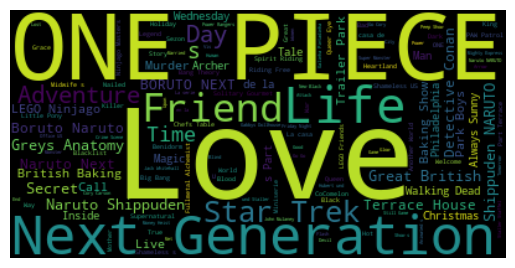

In [44]:
# remove non-english characters
pattern = r'[^a-zA-Z0-9\s]' 
shows["title_mod"] = shows["title"].str.replace(pattern, '', regex=True)


st = shows["title_mod"].str.replace(r"(Season|Limited Series|Temporada|Serie)", "", regex=True)

shows_title = " ".join([str(x) for x in st])
shows_title.replace("Season", "")
shows_wordcloud = WordCloud().generate(shows_title)
plt.imshow(shows_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

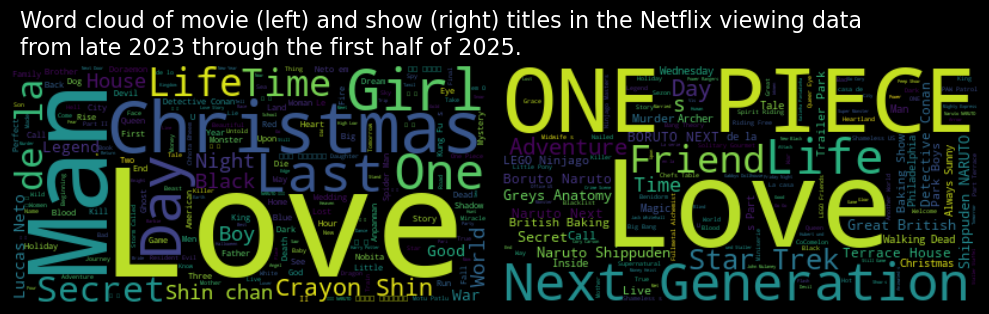

In [45]:
fig,ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(movies_wordcloud, interpolation='bilinear')
ax[1].imshow(shows_wordcloud, interpolation='bilinear')

ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()

fig.suptitle("Word cloud of movie (left) and show (right) titles in the Netflix viewing data \nfrom late 2023 through the first half of 2025.", 
                ha="left", x=0.025, y=0.85, fontsize=16, color='white')
fig.set_facecolor('black')
#plt.savefig("wordcloud.png", dpi=300)
plt.show()


In [49]:
with open("wordcloud.svg", "w", encoding="utf-8") as f:
            f.write(movies_wordcloud.to_svg())